# Data Analysis

In [62]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from IPython.core.display import HTML

In [63]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Read data

In [64]:
df = pd.read_csv('../dev.csv')
df

,ID,Parent,Component,Line,Column,EndLine,EndColumn,CC,CCL,CCO,...,Naming.Rules,Optimization.Rules,Security.Code.Guideline.Rules,Size.Metric.Rules,Strict.Exception.Rules,String.and.StringBuffer.Rules,Type.Resolution.Rules,Unnecessary.and.Unused.Code.Rules,Vulnerability.Rules,bugs
0,L725,L874,L103,44,1,223,2,0.082397,1,3,...,0,0,0,3,0,0,0,0,0,False
1,L7984,L8766,L103,10,1,43,2,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
2,L6110,L5338,L103,14,1,67,2,0.000000,0,0,...,0,0,0,1,0,0,0,0,0,False
3,L7289,L6714,L103,13,1,59,2,0.543860,1,4,...,2,0,0,0,0,0,0,0,0,False
4,L4437,L8973,L103,9,1,34,2,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71802,L1602,L20362,L103,33,1,86,2,0.441441,1,1,...,0,0,0,3,0,0,0,0,0,False
71803,L771,L37692,L103,29,1,85,2,0.000000,0,0,...,1,2,0,1,0,0,0,0,0,False
71804,L30823,L30750,L103,308,87,313,18,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
71805,L50337,L50312,L103,118,111,128,10,1.000000,2,6,...,0,0,0,0,0,0,0,0,0,False


#### Excluding duplicated rows and dropping NaN's

In [65]:
df=df.drop_duplicates()
df = df.dropna()
df

,ID,Parent,Component,Line,Column,EndLine,EndColumn,CC,CCL,CCO,...,Naming.Rules,Optimization.Rules,Security.Code.Guideline.Rules,Size.Metric.Rules,Strict.Exception.Rules,String.and.StringBuffer.Rules,Type.Resolution.Rules,Unnecessary.and.Unused.Code.Rules,Vulnerability.Rules,bugs
0,L725,L874,L103,44,1,223,2,0.082397,1,3,...,0,0,0,3,0,0,0,0,0,False
1,L7984,L8766,L103,10,1,43,2,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
2,L6110,L5338,L103,14,1,67,2,0.000000,0,0,...,0,0,0,1,0,0,0,0,0,False
3,L7289,L6714,L103,13,1,59,2,0.543860,1,4,...,2,0,0,0,0,0,0,0,0,False
4,L4437,L8973,L103,9,1,34,2,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71802,L1602,L20362,L103,33,1,86,2,0.441441,1,1,...,0,0,0,3,0,0,0,0,0,False
71803,L771,L37692,L103,29,1,85,2,0.000000,0,0,...,1,2,0,1,0,0,0,0,0,False
71804,L30823,L30750,L103,308,87,313,18,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
71805,L50337,L50312,L103,118,111,128,10,1.000000,2,6,...,0,0,0,0,0,0,0,0,0,False


#### Understanding some feature types

In [66]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71588 entries, 0 to 71806
Data columns (total 110 columns):
 #    Column                             Dtype  
---   ------                             -----  
 0    ID                                 object 
 1    Parent                             object 
 2    Component                          object 
 3    Line                               int64  
 4    Column                             int64  
 5    EndLine                            int64  
 6    EndColumn                          int64  
 7    CC                                 float64
 8    CCL                                int64  
 9    CCO                                int64  
 10   CI                                 int64  
 11   CLC                                float64
 12   CLLC                               float64
 13   LDC                                int64  
 14   LLDC                               int64  
 15   LCOM5                              int64  
 16   NL

In that case we have 6 different float features that represents:

CC - the percentage of the source code that is part of at least one clone (how to get all lines in the source code?) <br />

CLC - the percentage of executed lines that is part of at least one clone (Line Coverage of a program is the number of executed lines divided by the total number of lines)<br />

CLLC - the percentage of lines of code that is part of at least one clone<br />

AD - the percentage of code documented?<br />

CD - Comment density (percentage of lines of code that are commented?)<br />

TCD - Total comment density?<br />

In [67]:
df_floats = df.select_dtypes(include=[float])
df_floats

,CC,CLC,CLLC,AD,CD,TCD
0,0.082397,0.055556,0.064935,0.000000,0.012821,0.012821
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.543860,0.468085,0.523810,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
71802,0.441441,0.185185,0.227273,0.100000,0.102041,0.102041
71803,0.000000,0.000000,0.000000,0.076923,0.104167,0.104167
71804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
71805,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000


Changing from percentage to absolute values:

Creating column ExecLines that represents "Executed lines" of code

In [68]:
df["ExecLines"] = df["EndLine"] - df["Line"]

Creating column ClonedExecLines that represents the number of executed lines that were part of at least one clone

In [69]:
df["ClonedExecLines"] = round(df["ExecLines"] * df["CLC"])
df["ClonedExecLines"] = df["ClonedExecLines"].astype(int)

Creating column ClonedExecLinesOfCode that represents the number of lines of code that were part of at least one clone

In [70]:
df["ClonedExecLinesOfCode"] = round(df["LOC"] * df["CLLC"])
df["ClonedExecLinesOfCode"] = df["ClonedExecLinesOfCode"].astype(int)

Exclude columns with percentages

In [71]:
df=df.drop(columns=df_floats.columns)

### Exclude the first to third column

In [72]:
df_copy = df.copy()
df_copy = df_copy.iloc[:, 3:]
df_copy = df_copy._get_numeric_data()

#### Check int columns that are being used as boolean flags and columns that does not change their own state

In [73]:
columns = []
for i in df_copy.columns:
    if df_copy[i].nunique() <= 2:
        print(i, df_copy[i].unique())
        print(sum(df_copy[i]))
        columns.append(i)

WarningBlocker [0 1]
10
Code.Size.Rules [0]
0
Comment.Rules [0]
0
Coupling.Rules [0]
0
MigratingToJUnit4.Rules [0]
0
Migration13.Rules [0]
0
Migration14.Rules [0]
0
Migration15.Rules [0]
0
Vulnerability.Rules [0 1]
10
bugs [False  True]
3292


10 different samples in WarningBlocker and Vulnerability.Rules doesn't make any influence in our analysis. The other columns, except bugs, will be dropped too.  

In [74]:
columns.remove("bugs")
df_copy = df_copy.drop(columns=columns)

In [75]:
df_copy

,Line,Column,EndLine,EndColumn,CCL,CCO,CI,LDC,LLDC,LCOM5,...,Security.Code.Guideline.Rules,Size.Metric.Rules,Strict.Exception.Rules,String.and.StringBuffer.Rules,Type.Resolution.Rules,Unnecessary.and.Unused.Code.Rules,bugs,ExecLines,ClonedExecLines,ClonedExecLinesOfCode
0,44,1,223,2,1,3,1,10,10,1,...,0,3,0,0,0,0,False,179,10,12
1,10,1,43,2,0,0,0,0,0,1,...,0,0,0,0,0,0,False,33,0,0
2,14,1,67,2,0,0,0,0,0,1,...,0,1,0,0,0,0,False,53,0,0
3,13,1,59,2,1,4,2,22,22,1,...,0,0,0,0,0,0,False,46,22,25
4,9,1,34,2,0,0,0,0,0,1,...,0,0,0,0,0,0,False,25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71802,33,1,86,2,1,1,1,10,10,0,...,0,3,0,0,0,0,False,53,10,12
71803,29,1,85,2,0,0,0,0,0,1,...,0,1,0,0,0,0,False,56,0,0
71804,308,87,313,18,0,0,0,0,0,0,...,0,0,0,0,0,0,False,5,0,0
71805,118,111,128,10,2,6,2,11,11,0,...,0,0,0,0,0,0,False,10,10,11


### Spliting dataframes where bugs are True and where bugs are False to study features frequencies 

In [76]:
df_copy_bugs_true = df_copy[df_copy["bugs"]==True]
df_copy_bugs_false = df_copy[df_copy["bugs"]==False]

##### Excluding target column

In [77]:
df_copy_bugs_true_label = df_copy_bugs_true["bugs"]
df_copy_bugs_false_label = df_copy_bugs_true["bugs"]
df_copy_bugs_true = df_copy_bugs_true.drop(columns=["bugs"])
df_copy_bugs_false = df_copy_bugs_false.drop(columns=["bugs"])
features = df_copy_bugs_true.columns.unique()

#### Ploting histograms: trying to figure out any type of correlation in codes where bugs=True and where bugs=False

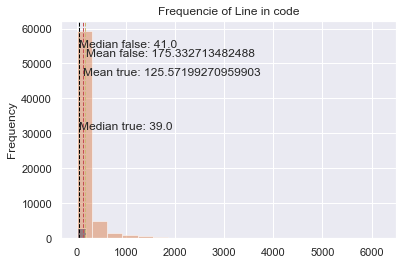

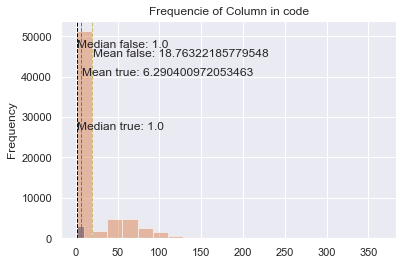

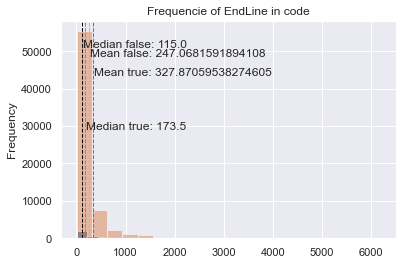

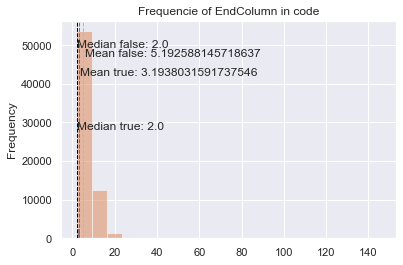

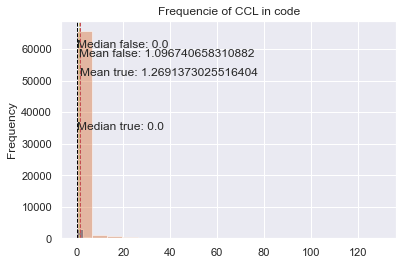

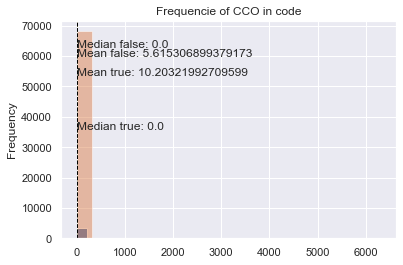

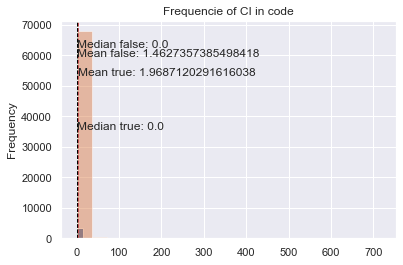

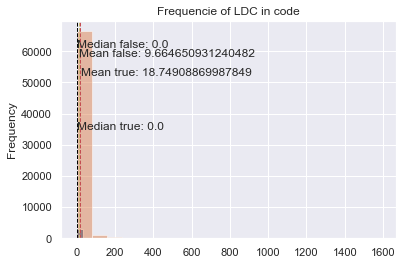

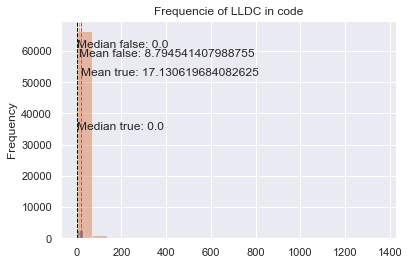

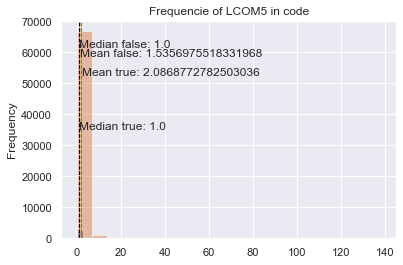

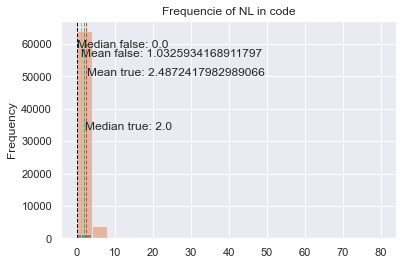

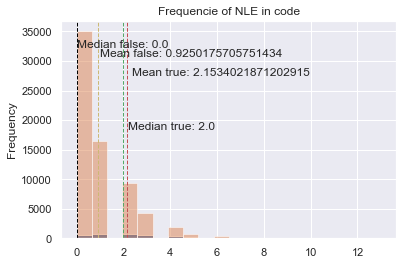

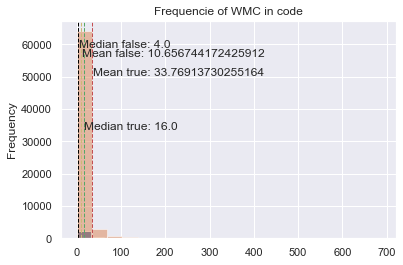

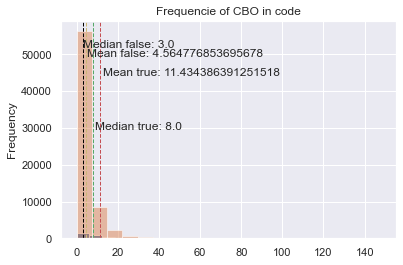

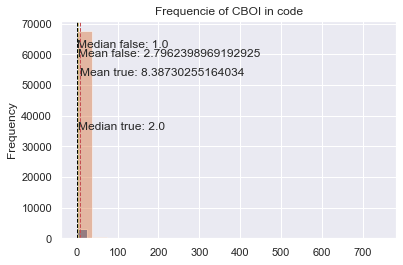

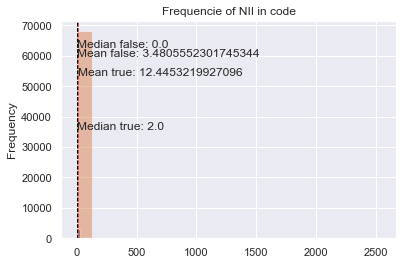

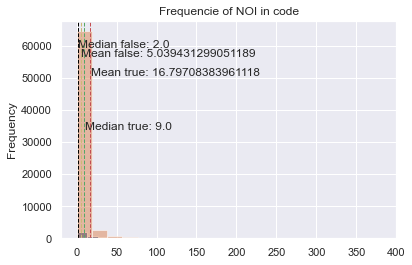

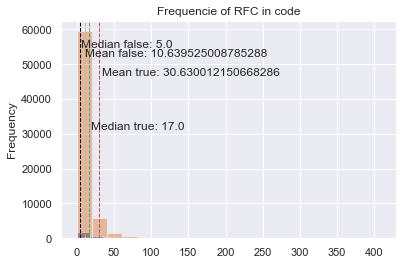

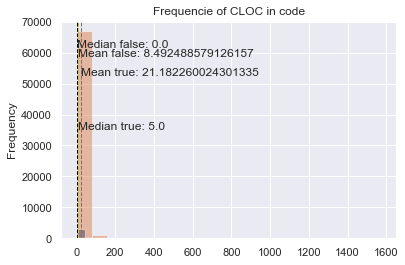

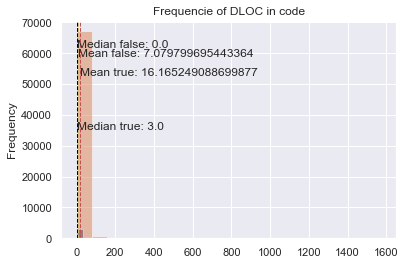

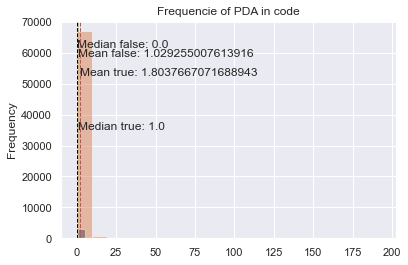

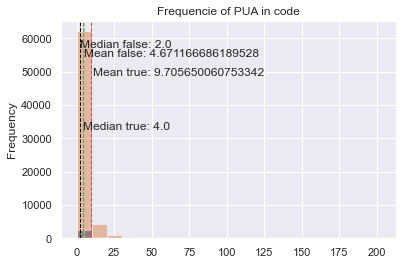

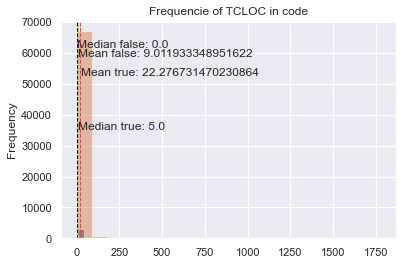

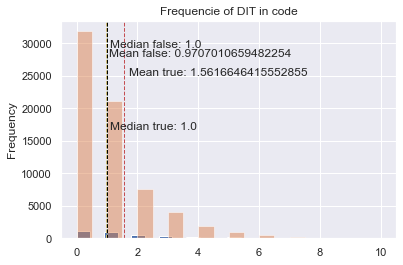

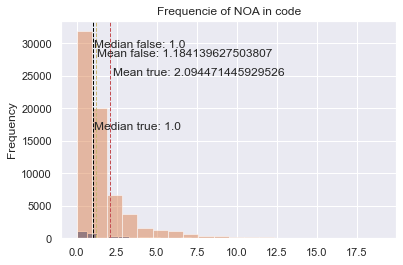

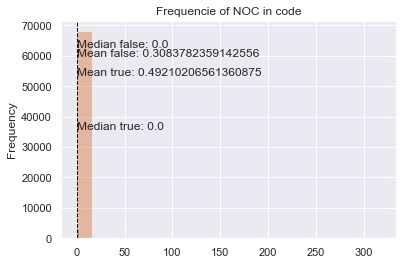

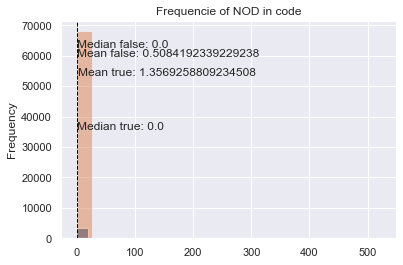

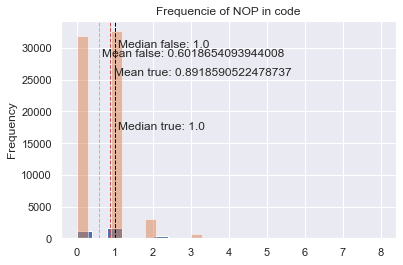

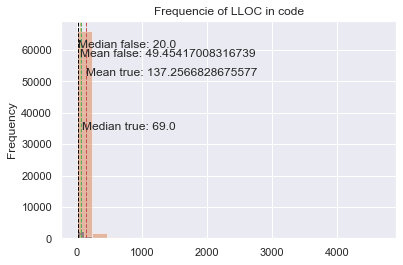

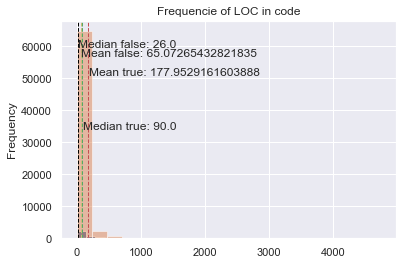

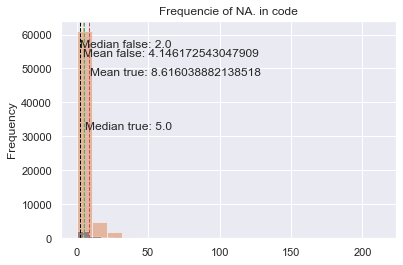

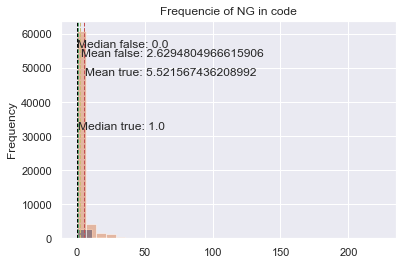

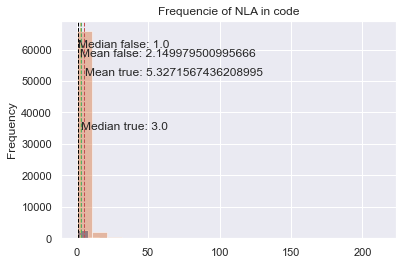

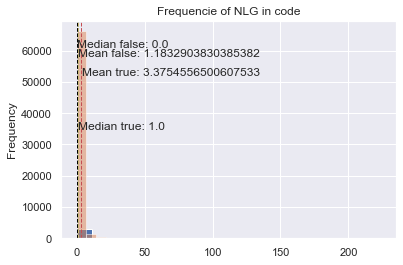

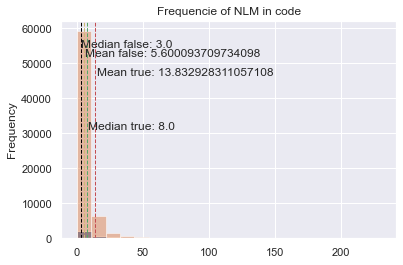

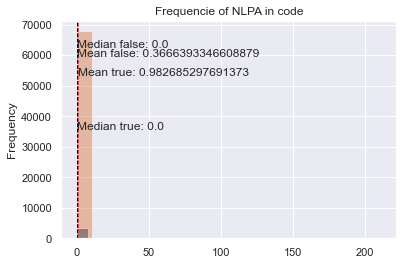

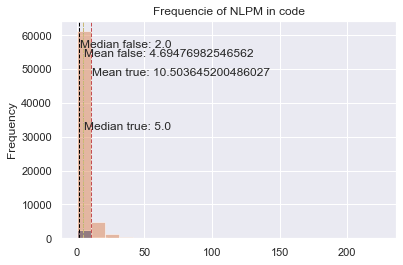

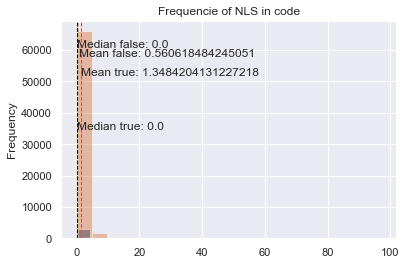

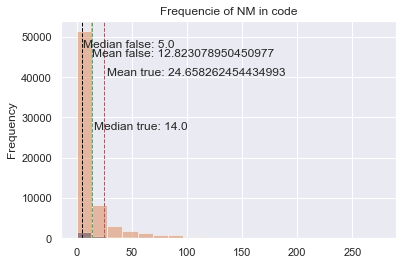

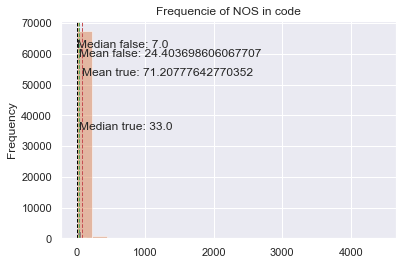

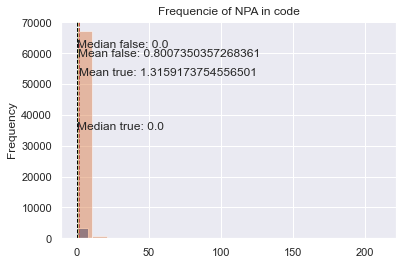

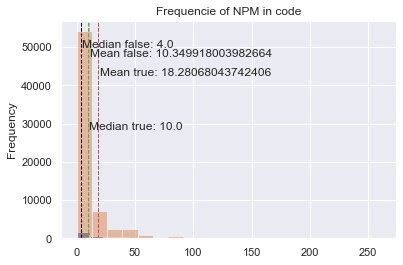

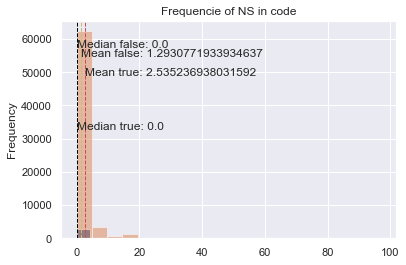

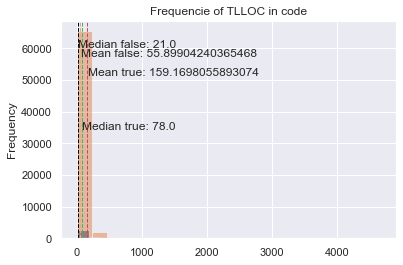

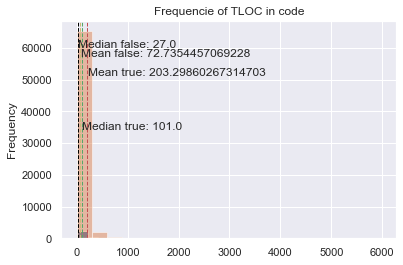

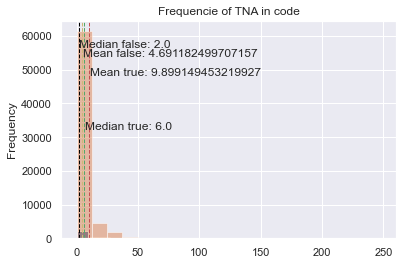

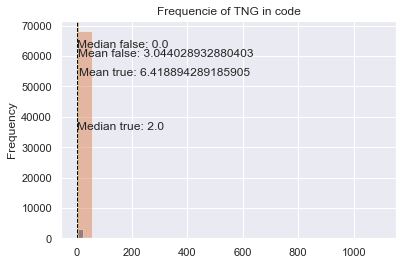

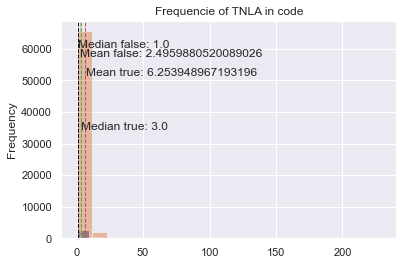

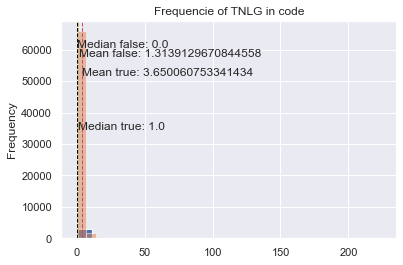

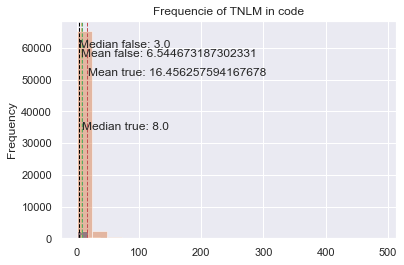

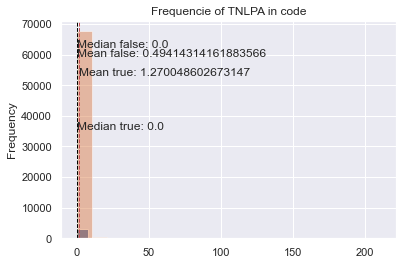

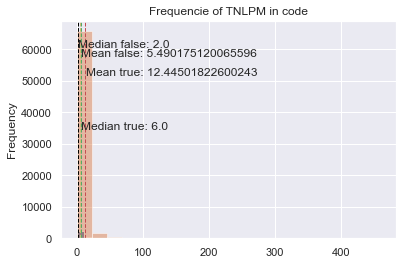

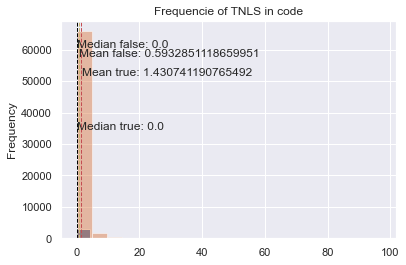

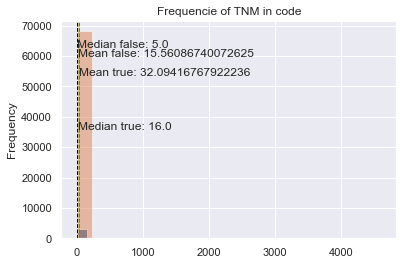

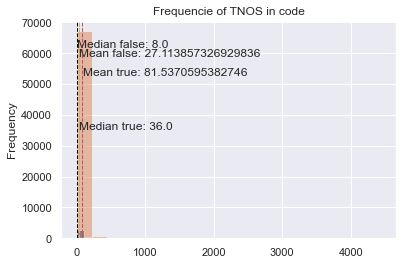

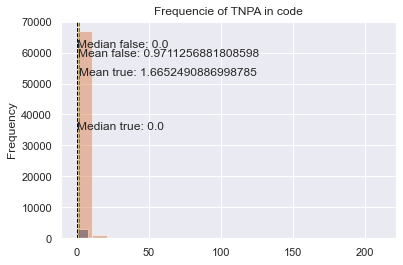

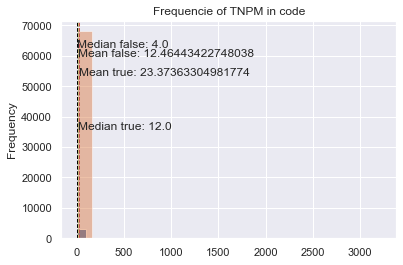

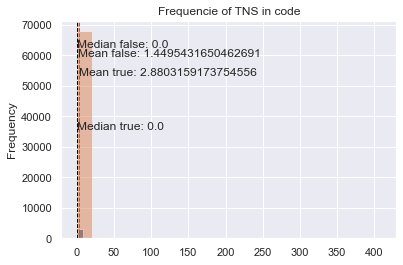

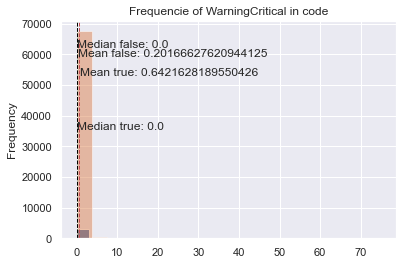

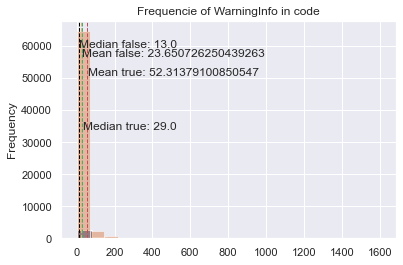

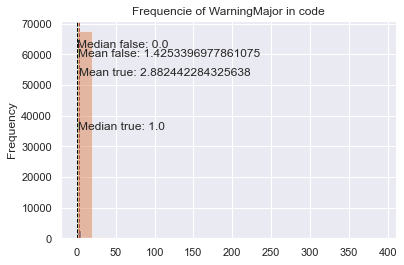

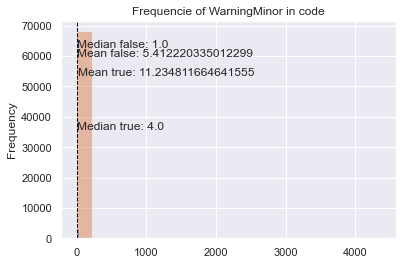

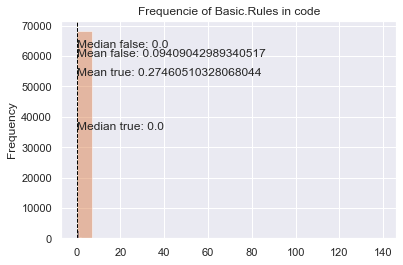

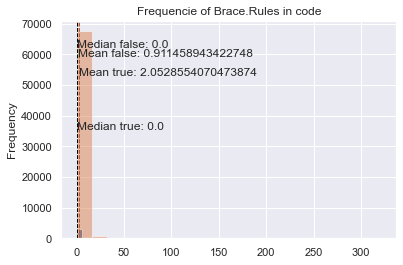

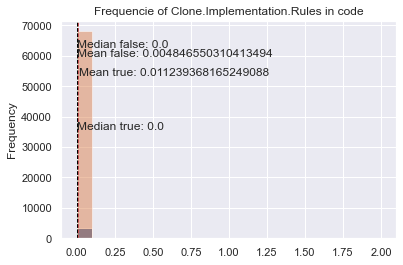

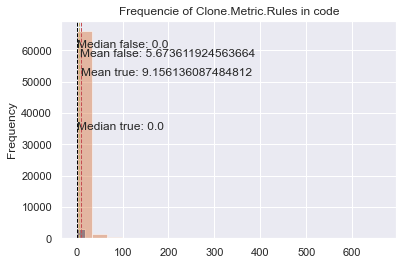

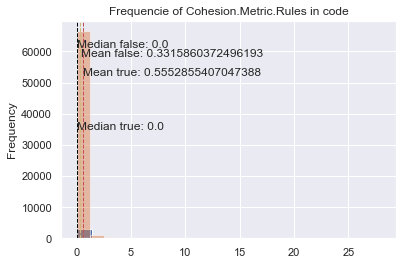

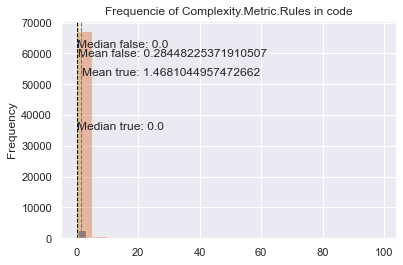

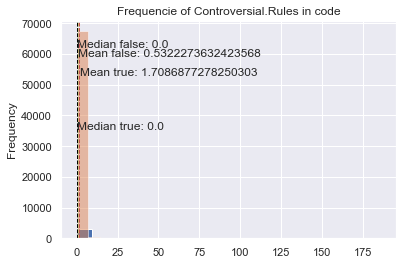

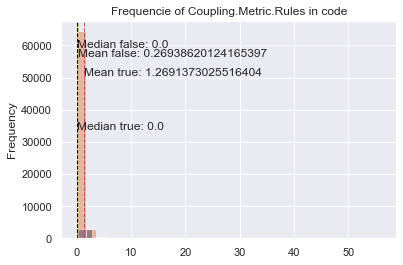

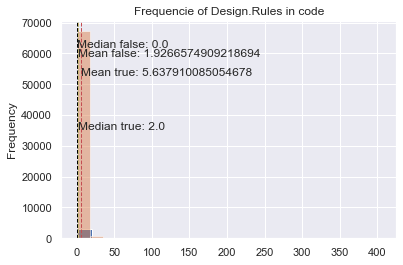

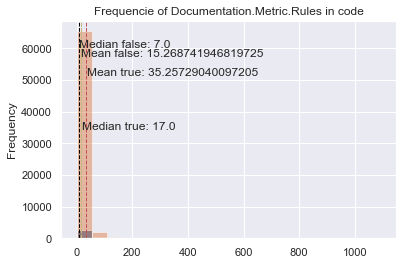

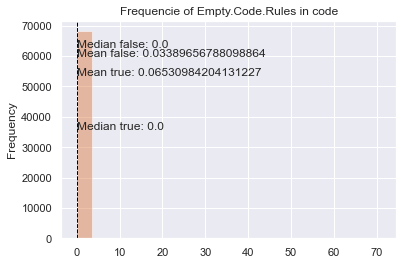

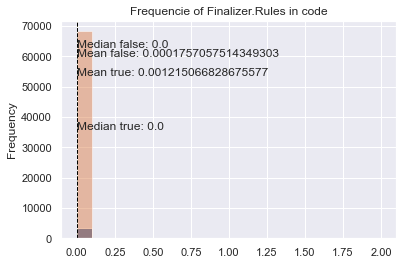

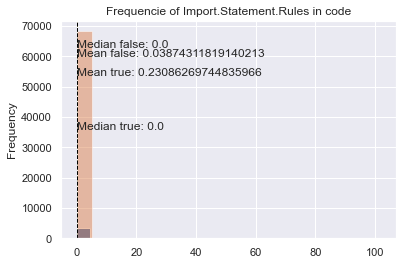

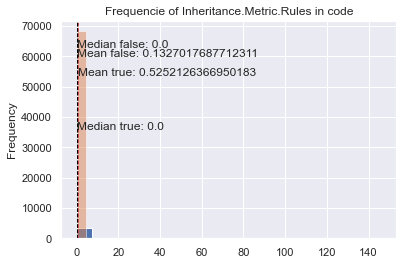

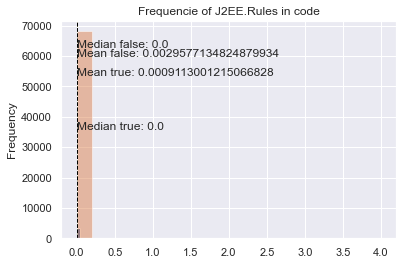

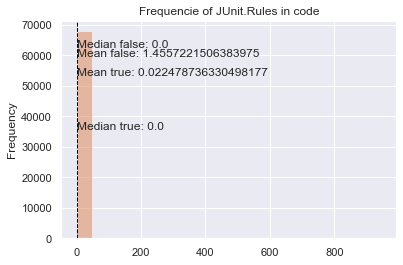

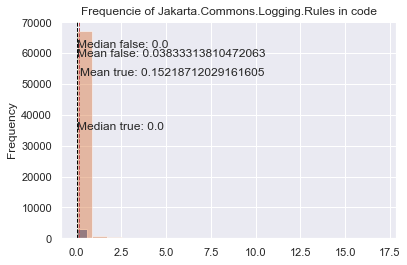

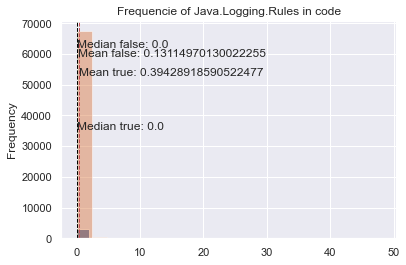

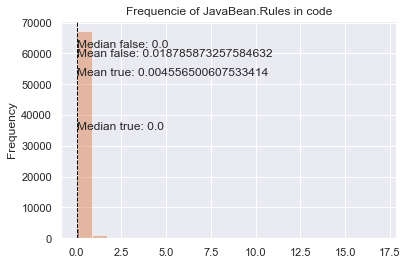

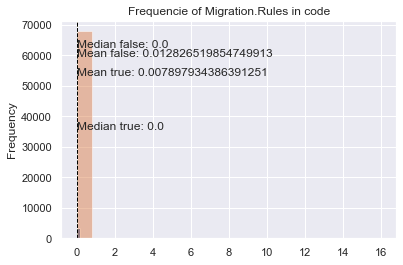

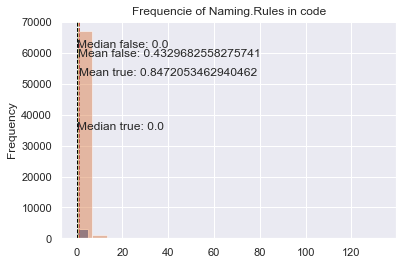

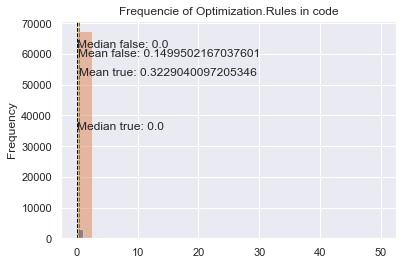

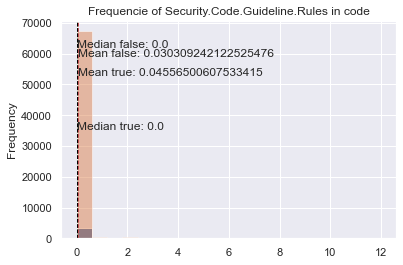

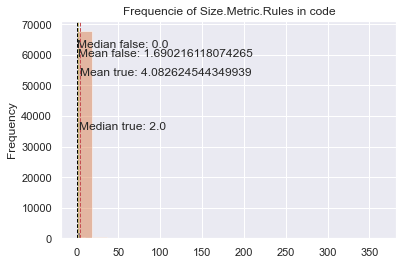

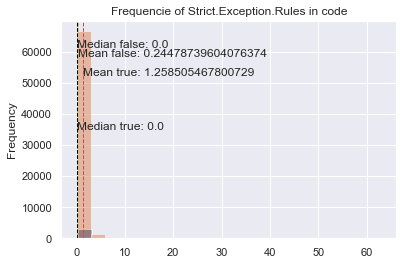

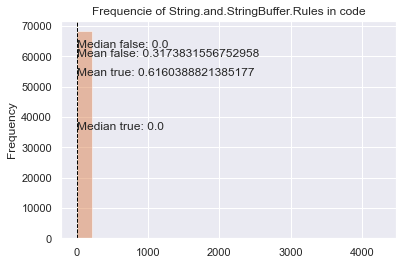

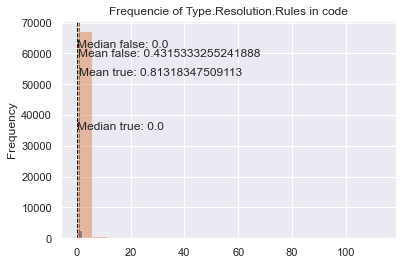

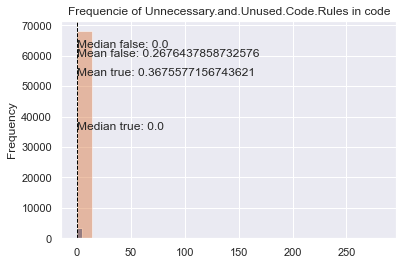

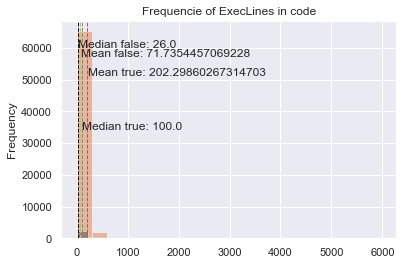

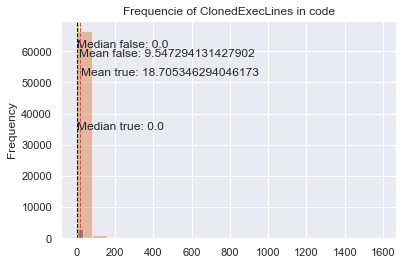

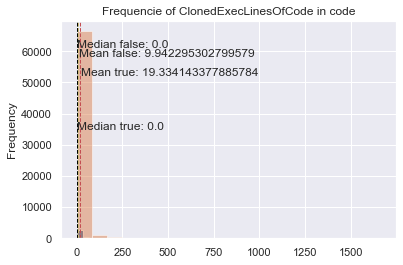

In [78]:
df_diff = {"feature": [], "diff_mean":[], "diff_median": []}
for i in features:
    numbers_true = df_copy_bugs_true[i].nunique()
    numbers_false = df_copy_bugs_false[i].nunique()
    
    if numbers_false > 1 and numbers_true > 1:
        df_copy_bugs_true[i].plot.hist(title = "Frequencie of {} in code".format(i), bins=20)
        df_copy_bugs_false[i].plot.hist(title = "Frequencie of {} in code".format(i), bins=20, alpha=0.5)

        mean_true = df_copy_bugs_true[i].mean()
        median_true = df_copy_bugs_true[i].median()
        
        mean_false = df_copy_bugs_false[i].mean()
        median_false = df_copy_bugs_false[i].median()
        
        df_diff["feature"].append(i)
        df_diff["diff_mean"].append(abs(mean_true-mean_false))
        df_diff["diff_median"].append(abs(median_true-median_false))

        plt.axvline(mean_true, color='r', linestyle='dashed', linewidth=1)
        plt.axvline(median_true, color='g', linestyle='dashed', linewidth=1)
        
        plt.axvline(mean_false, color='y', linestyle='dashed', linewidth=1)
        plt.axvline(median_false, color='black', linestyle='dashed', linewidth=1)

        _, max_ = plt.ylim()

        plt.text(mean_true + mean_true/10, max_ - max_/4, 'Mean true: {}'.format(mean_true))
        plt.text(median_true + median_true/10, max_ - max_/2, 'Median true: {}'.format(median_true))
        
        plt.text(mean_false + mean_false/10, max_ - max_/6, 'Mean false: {}'.format(mean_false))
        plt.text(median_false + median_false/10, max_ - max_/8, 'Median false: {}'.format(median_false))
        
        plt.show()

##### Really hard to compare all of those images. Due to it, we decided creating new data frames containing the feature, the absolute value of the difference between bugs=True mean and bugs=False mean & the absolute value of the difference between bugs=True median and bugs=False median

In [79]:
results = pd.DataFrame(df_diff)

##### Sorted by diff_median

In [80]:
results_sorted_by_median = results.sort_values(by=["diff_median"], ascending=False)
results_sorted_by_median.head()

,feature,diff_mean,diff_median
90,ExecLines,130.563157,74.0
44,TLOC,130.563157,74.0
29,LOC,112.880262,64.0
2,EndLine,80.802436,58.5
43,TLLOC,103.270763,57.0


In [81]:
results_sorted_by_median.to_excel("results_sorted_by_median.xlsx")

# Use this data for training/test

In [82]:
df_copy

,Line,Column,EndLine,EndColumn,CCL,CCO,CI,LDC,LLDC,LCOM5,...,Security.Code.Guideline.Rules,Size.Metric.Rules,Strict.Exception.Rules,String.and.StringBuffer.Rules,Type.Resolution.Rules,Unnecessary.and.Unused.Code.Rules,bugs,ExecLines,ClonedExecLines,ClonedExecLinesOfCode
0,44,1,223,2,1,3,1,10,10,1,...,0,3,0,0,0,0,False,179,10,12
1,10,1,43,2,0,0,0,0,0,1,...,0,0,0,0,0,0,False,33,0,0
2,14,1,67,2,0,0,0,0,0,1,...,0,1,0,0,0,0,False,53,0,0
3,13,1,59,2,1,4,2,22,22,1,...,0,0,0,0,0,0,False,46,22,25
4,9,1,34,2,0,0,0,0,0,1,...,0,0,0,0,0,0,False,25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71802,33,1,86,2,1,1,1,10,10,0,...,0,3,0,0,0,0,False,53,10,12
71803,29,1,85,2,0,0,0,0,0,1,...,0,1,0,0,0,0,False,56,0,0
71804,308,87,313,18,0,0,0,0,0,0,...,0,0,0,0,0,0,False,5,0,0
71805,118,111,128,10,2,6,2,11,11,0,...,0,0,0,0,0,0,False,10,10,11


In [83]:
try_prediction = df_copy.copy()
list_features = [i for i in results_sorted_by_median.head(50)["feature"]] + ["bugs"]
try_prediction = try_prediction[list_features]
try_prediction

,ExecLines,TLOC,LOC,EndLine,TLLOC,LLOC,TNOS,NOS,WarningInfo,RFC,...,PDA,NLG,NG,Import.Statement.Rules,J2EE.Rules,Finalizer.Rules,JUnit.Rules,Empty.Code.Rules,CCO,bugs
0,179,180,180,223,154,154,73,73,54,25,...,0,5,5,0,0,0,0,0,3,False
1,33,34,34,43,27,27,9,9,13,5,...,0,1,1,0,0,0,0,0,0,False
2,53,54,54,67,45,45,12,12,20,9,...,0,5,5,0,0,0,0,0,0,False
3,46,47,47,59,42,42,14,14,28,4,...,0,0,0,0,0,0,0,0,4,False
4,25,26,26,34,22,22,5,5,13,5,...,0,4,4,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71802,53,54,54,86,44,44,16,16,35,9,...,1,8,8,0,0,0,0,0,1,False
71803,56,57,57,85,43,43,11,11,28,12,...,1,4,4,0,0,0,0,0,0,False
71804,5,6,6,313,6,6,1,1,5,1,...,0,1,5,0,0,0,0,0,0,False
71805,10,11,11,128,11,11,4,4,15,2,...,0,0,0,0,0,0,0,0,6,False


In [84]:
try_prediction["bugs"]

0        False
1        False
2        False
3        False
4        False
         ...  
71802    False
71803    False
71804    False
71805    False
71806    False
Name: bugs, Length: 71588, dtype: bool

In [85]:
try_prediction.to_csv("dev_try_prediction.csv")

##### Sorted by diff_mean

In [86]:
results_sorted_by_mean = results.sort_values(by=["diff_mean"], ascending=False)
results_sorted_by_mean.head()

,feature,diff_mean,diff_median
90,ExecLines,130.563157,74.0
44,TLOC,130.563157,74.0
29,LOC,112.880262,64.0
43,TLLOC,103.270763,57.0
28,LLOC,87.802513,49.0


In [87]:
results_sorted_by_mean.to_excel("results_sorted_by_mean.xlsx")

## Find correlations between column data where bugs are True

In [88]:
corr_matrix = df_copy_bugs_true.corr().abs()

In [89]:
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

### 50 higher correlations between variables when bugs are True

In [90]:
correlations_true = {"corr1": [], "corr2":[], "R": []}
for corrs, val in zip(sol.index, sol.values):
    if val > 0.7 or val < -0.7:
        correlations_true["corr1"].append(corrs[0])
        correlations_true["corr2"].append(corrs[1])
        correlations_true["R"].append(val)

df_corrs_true = pd.DataFrame(correlations_true)
df_corrs_true.head(50)

,corr1,corr2,R
0,TLOC,ExecLines,1.000000
1,LDC,ClonedExecLines,0.999991
2,LLDC,ClonedExecLines,0.995464
3,LDC,LLDC,0.995426
4,CLOC,TCLOC,0.988252
5,NLS,TNLS,0.987851
6,NLG,TNLG,0.985098
7,TNM,TNPM,0.982752
8,TLLOC,ExecLines,0.982710
9,TLLOC,TLOC,0.982710


## Find correlations between column data where bugs are False

In [91]:
features = df_copy_bugs_false.columns.unique()

In [92]:
corr_matrix = df_copy_bugs_false.corr().abs()

In [93]:
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

In [94]:
correlations_false = {"corr1": [], "corr2":[], "R": []}
for corrs, val in zip(sol.index, sol.values):
    if val > 0.7 or val < -0.7:
        correlations_false["corr1"].append(corrs[0])
        correlations_false["corr2"].append(corrs[1])
        correlations_false["R"].append(val)

df_corrs_false = pd.DataFrame(correlations_false)
df_corrs_false.head(50)

,corr1,corr2,R
0,TLOC,ExecLines,1.000000
1,LDC,ClonedExecLines,0.999971
2,LLDC,ClonedExecLines,0.995696
3,LDC,LLDC,0.995694
4,TNM,TNPM,0.983090
5,CLOC,TCLOC,0.980555
6,TLLOC,ExecLines,0.979640
7,TLLOC,TLOC,0.979640
8,NLS,TNLS,0.976988
9,CLOC,DLOC,0.976490
